In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'
np.random.seed(42)

In [20]:
X = np.zeros((400, 2))
X[:100, :] = np.random.randn(100, 2) * 0.5 + np.array([2, 2])
X[100:200, :] = np.random.randn(100, 2) * 0.5 + np.array([-2, 2])
X[200:300, :] = np.random.randn(100, 2) * 0.5 + np.array([-2, -2])
X[300:, :] = np.random.randn(100, 2) * 0.5 + np.array([2, -2])

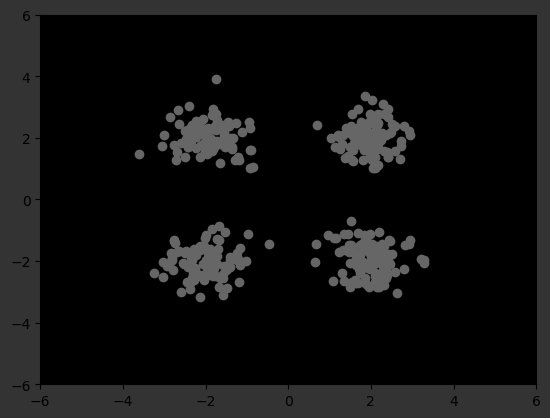

In [21]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

--------

# Lloyd's algorithm

In [45]:
k = 4 # amount of clusters
max_iterations = 100

In [47]:
initial_indices = np.random.choice(X.shape[0], size=k, replace=False)
centroids = X[initial_indices, :]
centroids #the initial centroids are 4 random observations of the dataset

array([[-1.24882147, -1.96295261],
       [ 1.5957532 ,  1.74912148],
       [ 2.10704687,  1.37713061],
       [ 1.98118265, -1.44834906]])

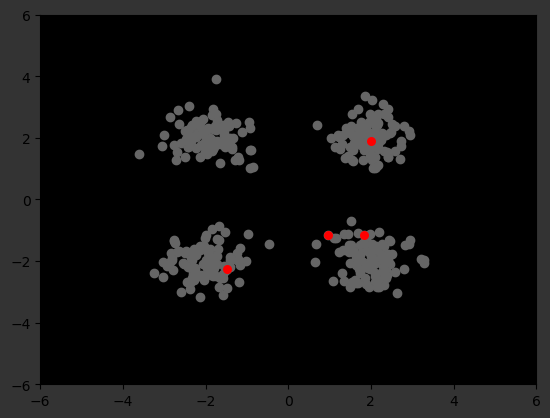

In [42]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.scatter(centroids[:,0], centroids[:,1],zorder=2, color='red', s=30)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()